# Detecting COVID-19 with Chest X Ray using PyTorch
Image classification of Chest X Rays in one of three classes: Normal, Viral Pneumonia, COVID-19

Dataset from [COVID-19 Radiography Dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database) on Kaggle

# Importing Libraries

In [1]:
%matplotlib inline

import os
import torch
import random
import torchvision
import numpy as np
import pandas as pd

from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import clear_output

torch.manual_seed(0)

print('Using PyTorch version', torch.__version__)

Using PyTorch version 1.7.0+cu101


# Load Datasets
## COVID-19

In [2]:
covid_df = pd.read_csv('../datasets/normal-viral-covid19/COVID-19.metadata.csv')
images_dir = '../datasets/normal-viral-covid19/covid'
images = [x for x in os.listdir(images_dir)[:300] if x[-3:].lower().endswith('png')]
images_map = {image.replace(' ', '').split('.')[0]: image for image in images}

covid_df['PATH'] = covid_df.apply(lambda col: '%s/%s' % (images_dir, images_map[col['FILE NAME']]), axis=1)
covid_df

,FILE NAME,FORMAT,SIZE,URL,PATH
0,COVID-19(1),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,../datasets/normal-viral-covid19/covid/COVID-1...
1,COVID-19(2),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,../datasets/normal-viral-covid19/covid/COVID-1...
2,COVID-19(3),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,../datasets/normal-viral-covid19/covid/COVID-1...
3,COVID-19(4),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,../datasets/normal-viral-covid19/covid/COVID-1...
4,COVID-19(5),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,../datasets/normal-viral-covid19/covid/COVID-1...
...,...,...,...,...,...
268,COVID-19(269),PNG,NaN,serial1,../datasets/normal-viral-covid19/covid/COVID-1...
269,COVID-19(270),PNG,NaN,serial2,../datasets/normal-viral-covid19/covid/COVID-1...
270,COVID-19(271),PNG,NaN,serial3,../datasets/normal-viral-covid19/covid/COVID-1...
271,COVID-19(272),PNG,NaN,serial4,../datasets/normal-viral-covid19/covid/COVID-1...


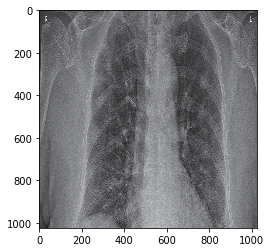

In [4]:
im_frame = Image.open(covid_df.at[0, 'PATH'])
                                    
np_frame = np.array(im_frame)
plt.imshow(np_frame)

## COVID-19 Valencia

In [5]:
valencia_covid_df = pd.read_csv('../datasets/bimcv-covid19/bimcv-covid19.csv', index_col=0)

valencia_covid_df

,Subject,Session,Date,Age,Sex,Filename,Path,Is frontal
0,sub-S03533,ses-E07501,20200328,052Y,M,mod-rx/sub-S03533_ses-E07501_bp-chest_run-1_cr...,../datasets/bimcv-covid19/sub-S03533/ses-E0750...,y
1,sub-S03533,ses-E07501,20200328,052Y,M,mod-rx/sub-S03533_ses-E07501_bp-chest_run-2_cr...,../datasets/bimcv-covid19/sub-S03533/ses-E0750...,y
2,sub-S03909,ses-E08005,20200330,NaN,M,mod-rx/sub-S03909_ses-E08005_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03909/ses-E0800...,y
3,sub-S03711,ses-E07526,20200322,NaN,F,mod-rx/sub-S03711_ses-E07526_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03711/ses-E0752...,y
4,sub-S03711,ses-E07526,20200322,NaN,F,mod-rx/sub-S03711_ses-E07526_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03711/ses-E0752...,n
...,...,...,...,...,...,...,...,...
3032,sub-S03288,ses-E07142,20200310,NaN,F,mod-rx/sub-S03288_ses-E07142_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03288/ses-E0714...,y
3033,sub-S03288,ses-E06470,20200222,NaN,F,mod-rx/sub-S03288_ses-E06470_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03288/ses-E0647...,y
3034,sub-S03288,ses-E06470,20200222,NaN,F,mod-rx/sub-S03288_ses-E06470_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03288/ses-E0647...,n
3035,sub-S03492,ses-E07022,20200311,NaN,F,mod-rx/sub-S03492_ses-E07022_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03492/ses-E0702...,y


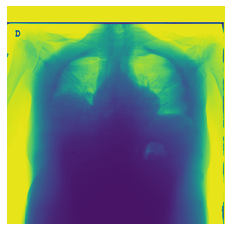

In [9]:
im_frame = Image.open(valencia_covid_df.at[0, 'Path']).resize((224, 224))
                                    
np_frame = np.array(im_frame)
plt.imshow(np_frame)
plt.axis('off')
plt.savefig('a.jpg', bbox_inches='tight')

In [10]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(Image.open(valencia_covid_df.at[0, 'Path']))
# save the image
plt.imsave('a.jpg', data)

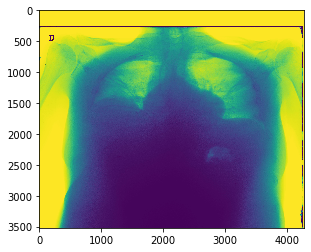

In [11]:
im_frame = Image.open('a.jpg').convert('RGB')
                                    
np_frame = np.array(im_frame)
ax = plt.imshow(np_frame)

## Normal

In [12]:
normal_df = pd.read_csv('../datasets/normal-viral-covid19/NORMAL.metadata.csv')
images_dir = '../datasets/normal-viral-covid19/normal/'

normal_df['PATH'] = normal_df.apply(lambda col: '%s/%s).png' % (images_dir, col['FILE NAME'].replace('-', ' (')), axis=1)
normal_df

,FILE NAME,FORMAT,SIZE,URL,PATH
0,NORMAL-1,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
1,NORMAL-2,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
2,NORMAL-3,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
3,NORMAL-4,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
4,NORMAL-5,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
...,...,...,...,...,...
1336,NORMAL-1337,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
1337,NORMAL-1338,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
1338,NORMAL-1339,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
1339,NORMAL-1340,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...


## Viral

In [13]:
viral_df = pd.read_csv('../datasets/normal-viral-covid19/' + 'Viral Pneumonia.matadata.csv')
images_dir = '../datasets/normal-viral-covid19/viral/'

viral_df['PATH'] = viral_df.apply(lambda col: '%s/%s).png' % (images_dir, col['FILE NAME'].replace('-', ' (')), axis=1)
viral_df

,FILE NAME,FORMAT,SIZE,URL,PATH
0,Viral Pneumonia-1,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
1,Viral Pneumonia-2,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
2,Viral Pneumonia-3,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
3,Viral Pneumonia-4,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
4,Viral Pneumonia-5,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
...,...,...,...,...,...
1340,Viral Pneumonia-1341,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
1341,Viral Pneumonia-1342,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
1342,Viral Pneumonia-1343,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
1343,Viral Pneumonia-1344,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...


# Creating Custom Dataset

In [14]:
class ChestXRayDataset(torch.utils.data.Dataset):
    def __init__(self, images, transform):
        
        self.images = images
        self.class_names = ['normal', 'viral', 'covid']
        self.transform = transform
    
    def __len__(self):
        return sum([len(self.images[class_name]) for class_name in self.class_names])
    
    def __getitem__(self, index):
        all_images = self.images[self.class_names[0]] \
          + self.images[self.class_names[1]] \
          + self.images[self.class_names[2]]
        all_class_names = [self.class_names[0]]*len(self.images[self.class_names[0]]) \
          + [self.class_names[1]]*len(self.images[self.class_names[1]]) \
          + [self.class_names[2]]*len(self.images[self.class_names[2]])
        image_path = all_images[index]
        class_name = all_class_names[index]
        image = Image.open(image_path)
        if 'bimcv' in image_path:
            data = np.array(Image.open(image_path))
            # save the image
            plt.imsave(image_path.replace('png','jpg'), data)
            image = Image.open(image_path.replace('png','jpg'))
        return self.transform(image.convert('RGB')), self.class_names.index(class_name)

# Image Transformations

In [15]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Prepare DataLoader

In [16]:
len_covid = len(covid_df)
len_viral = len(viral_df)
len_normal = len(normal_df)

In [17]:
train_dirs = {
    'normal': list(normal_df['PATH'].values[:int(len_normal*0.8)]),
    'viral': list(viral_df['PATH'].values[:int(len_viral*0.8)]),
    'covid': list(covid_df['PATH'].values[:int(len_covid*0.8)]) + list(valencia_covid_df['Path'].values[:int((len_normal-len_covid)*0.8)])
}

train_dataset = ChestXRayDataset(train_dirs, transform)

In [18]:
for item in train_dirs.values():
    print(len(item))

1072
1076
1072


In [19]:
dev_dirs = {
    'normal': list(normal_df['PATH'].values[int(len_normal*0.8):int(len_normal*0.9)]),
    'viral': list(viral_df['PATH'].values[int(len_viral*0.8):int(len_viral*0.9)]),
    'covid': list(covid_df['PATH'].values[int(len_covid*0.8):int(len_covid*0.9)]) + list(valencia_covid_df['Path'].values[int((len_normal-len_covid)*0.8):int((len_normal-len_covid)*0.9)])
}

dev_dataset = ChestXRayDataset(dev_dirs, transform)

In [20]:
for item in dev_dirs.values():
    print(len(item))

134
134
134


In [21]:
test_dirs = {
    'normal': list(normal_df['PATH'].values[int(len_normal*0.9):]),
    'viral': list(viral_df['PATH'].values[int(len_viral*0.9):]),
    'covid': list(covid_df['PATH'].values[int(len_covid*0.9):]) + list(valencia_covid_df['Path'].values[int((len_normal-len_covid)*0.8):int((len_normal-len_covid)*0.9)])
}

test_dataset = ChestXRayDataset(test_dirs, transform)

In [22]:
for item in test_dirs.values():
    print(len(item))

135
135
135


In [23]:
batch_size = 24

dl_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dl_dev = torch.utils.data.DataLoader(dev_dataset, batch_size=batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

print('Number of training batches', len(dl_train))
print('Number of dev batches', len(dl_dev))
print('Number of test batches', len(dl_test))

Number of training batches 135
Number of dev batches 17
Number of test batches 17


# Data Visualization

In [24]:
class_names = train_dataset.class_names

def show_images(images, labels, preds):
    plt.figure(figsize=(8, 8))
    for i, image in enumerate(images):
        plt.subplot(4, 6, (i + 1), xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image)
        col = 'red' if preds[i] != labels[i] else 'green'

        plt.xlabel(f'{class_names[int(labels[i].numpy())]}')
        plt.ylabel(f'{class_names[int(preds[i].numpy())]}', color=col)
    plt.tight_layout()
    plt.show()

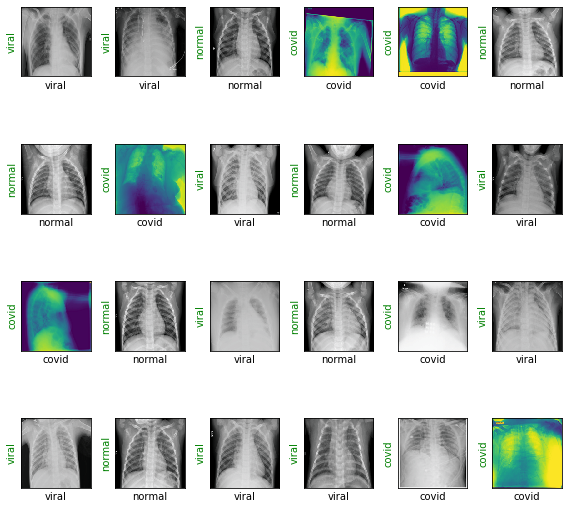

In [25]:
images, labels = next(iter(dl_train))
show_images(images, labels, labels)

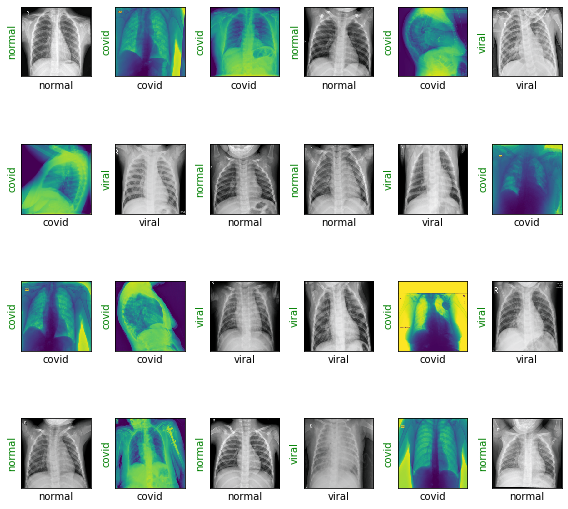

In [26]:
images, labels = next(iter(dl_dev))
show_images(images, labels, labels)

# Creating the Model
## DenseNet121
Next, we will use a pre-trained DenseNet121 model which we can load directly from PyTorch and then add two layers on top of it:


1.   A GlobalAveragePooling2D layer to get the average of the last convolution layers from DenseNet121.

2.   A Dense layer with sigmoid activation to get the prediction logits for each of our classes.


We can set our custom loss function for the model by specifying the loss parameter in the compile() function.

## Transfer Learning DenseNet121

In [27]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import copy
import time

In [28]:
from IPython import display

# kill error when executing argparse in IPython console
import sys; sys.argv=['']; del sys

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [29]:
import argparse
# parse arguments
parser = argparse.ArgumentParser(description='Imbalanced Dataset Example')
parser.add_argument('--data', metavar='DIR', default='./data/oven', help='path to dataset')
parser.add_argument('--arch', '-a', metavar='ARCH', default='resnet18')
parser.add_argument('--epochs', default=90, type=int, metavar='N',
                    help='number of total epochs to run')
parser.add_argument('-b', '--batch-size', default=6, type=int,
                    metavar='N', help='mini-batch size (default: 6)')
parser.add_argument('--lr', '--learning-rate', default=0.1, type=float,
                    metavar='LR', help='initial learning rate')
parser.add_argument('--momentum', default=0.9, type=float, metavar='M',
                    help='momentum')
parser.add_argument('--weight-decay', '--wd', default=1e-4, type=float,
                    metavar='W', help='weight decay (default: 1e-4)')
parser.add_argument('--no-cuda', action='store_true', default=True,
                    help='disables CUDA training')
parser.add_argument('--seed', type=int, default=42, metavar='S',
                    help='random seed (default: 42)')
args = parser.parse_args()
use_cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed)
device = torch.device("cuda" if use_cuda else "cpu")


In [30]:
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

dataset_sizes = {
  'train' : len(train_dataset),
  'dev' : len(dev_dataset),
  'test' : len(test_dataset)
}

dataloaders  = {
    'train' : dl_train,
    'dev': dl_dev,
    'test': dl_test
}

In [31]:
model =  torch.hub.load('pytorch/vision:v0.6.0', 'densenet121', pretrained=True)
ct = 0
for child in model.children():
    ct+=1
    print("ct: ", ct)

Using cache found in /home/ubuntu/.cache/torch/hub/pytorch_vision_v0.6.0


ct:  1
ct:  2


In [40]:
class Model(nn.Module):
  def __init__(self, num_classes = 3, num_channels=6):
    super(Model, self).__init__()
    # obtain the desired model from the pretrained models library
    # loading a pretrained model
    self.model =  torch.hub.load('pytorch/vision:v0.6.0', 'densenet121', pretrained=True)

    # Build our classifier 
    self.classifier = nn.Linear(1024, num_classes, bias=True)
    ## Freeze model weights 
    ##ct = 0
    ##for child in self.model.children():
      ##  ct+=1
        ##if ct < 2:
          ##  for params in child.parameters():
            ##    params.requires_grad = False  
    # We replace last layer of base model to our custom trainable classifier
    self.model.classifier = self.classifier

  def forward(self, x):
    features = self.features(x)
    out = F.relu(features, inplace=True)
    out = F.adaptive_avg_pool2d(out, (1,1))
    out = torch.flatten(out,1)
    out = self.model.classifier(out)
    return out
  
  def fit(self, dataloaders, num_epochs):

    # We check whether a gpu is enabled for our environment.
    
    train_on_gpu = torch.cuda.is_available()
    
    # We define our optimizer and pass in the model parameters (weights and biases) 
    # into the constructor of the optimizer we want. 
    # More info: https://pytorch.org/docs/stable/optim.html
    
    optimizer = optim.Adam(self.model.parameters())
    
    # Essentially what scheduler does is to reduce our learning by a certain factor 
    # when less progress is being made in our training.
    
    scheduler = optim.lr_scheduler.StepLR(optimizer, 4)
    
    # Criterion is the loss function of our model. 
    # We use Negative Log-Likelihood loss because we used log-softmax as the last layer of our model. 
    # We can remove the log-softmax layer and replace the nn.NLLLoss() with nn.CrossEntropyLoss()
    
    #criterion = nn.NLLLoss()
    criterion = nn.CrossEntropyLoss()
    since = time.time()
    
    # model.state_dict() is a dictionary of our model's parameters. What we did here 
    # is to deepcopy it and assign it to a variable
    
    best_model_wts = copy.deepcopy(self.model.state_dict())
    best_acc = 0.0
    
    # We check if a gpu is enabled for our environment and move our model to the gpu
    
    if train_on_gpu:
        self.model = self.model.cuda()
    for epoch in range(1,num_epochs+1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 10)
        
        # Each epoch has a training and validation phase. 
        # We iterate through the training set and validation set in every epoch.
        
        for phase in ['train', 'dev']:
        
            # we apply the scheduler to the learning rate in the training phase since 
            # we don't train our model in the validation phase
            
            if phase == 'train':
                scheduler.step()
                self.model.train()  # Set model to training mode
            else:
                self.model.eval()   #Set model to evaluate mode to turn off features like dropout
            running_loss = 0.0
            running_corrects = 0
            
            # Iterate over batches of train and validation data.
            
            for inputs, labels in dataloaders[phase]:
                if train_on_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                    
                # clear all gradients since gradients get accumulated after every iteration.
                optimizer.zero_grad()
    
                # track history if only in training phase
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = self.model(inputs)
                    _, preds = torch.max(outputs, 1)
                    
                # calculates the loss between the output of our model and ground-truth
                labels
                
                loss = criterion(outputs, labels)
                
                # perform backpropagation and optimization only if in training phase
                
                if phase == 'train':
                
                # backpropagate gradients from the loss node through all the parameters
                    loss.backward()
                    
                    # Update parameters(Weighs and biases) of our model using the gradients.
                    
                    optimizer.step()
              # Statistics
              
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
                
            # Deep copy the model if we obtain a better validation accuracy than the previous one.
            
            if phase == 'dev'  and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(self.model.state_dict())
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    
    # Load best model parameters and return it as the final trained model.
    
    self.model.load_state_dict(best_model_wts)
    return self.model

In [41]:
# We instantiate our model class
densenet121 = Model()


# Run 10 training epochs on our model
densenet121_ft = densenet121.fit(dataloaders, 20)

Using cache found in /home/ubuntu/.cache/torch/hub/pytorch_vision_v0.6.0


Epoch 1/20
----------


/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.1956 Acc: 0.9270
dev Loss: 0.1052 Acc: 0.9527
Epoch 2/20
----------
train Loss: 0.1139 Acc: 0.9559
dev Loss: 0.6771 Acc: 0.8209
Epoch 3/20
----------
train Loss: 0.0961 Acc: 0.9652
dev Loss: 0.0894 Acc: 0.9627
Epoch 4/20
----------
train Loss: 0.0473 Acc: 0.9835
dev Loss: 0.0581 Acc: 0.9776
Epoch 5/20
----------
train Loss: 0.0282 Acc: 0.9901
dev Loss: 0.0584 Acc: 0.9826
Epoch 6/20
----------
train Loss: 0.0255 Acc: 0.9938
dev Loss: 0.0470 Acc: 0.9851
Epoch 7/20
----------
train Loss: 0.0177 Acc: 0.9953
dev Loss: 0.0324 Acc: 0.9876
Epoch 8/20
----------
train Loss: 0.0136 Acc: 0.9966
dev Loss: 0.0331 Acc: 0.9876
Epoch 9/20
----------
train Loss: 0.0133 Acc: 0.9966
dev Loss: 0.0405 Acc: 0.9851
Epoch 10/20
----------
train Loss: 0.0097 Acc: 0.9984
dev Loss: 0.0373 Acc: 0.9876
Epoch 11/20
----------
train Loss: 0.0102 Acc: 0.9984
dev Loss: 0.0370 Acc: 0.9900
Epoch 12/20
----------
train Loss: 0.0101 Acc: 0.9975
dev Loss: 0.0363 Acc: 0.9876
Epoch 13/20
----------
train Loss: 

In [42]:
densenet121_ft.eval()
labels_all = []
preds_all = []
for i, (images, labels) in enumerate(dl_test):
    output = densenet121_ft(images)
    _, preds = torch.max(output, 1)
    labels_all += labels
    preds_all += preds

In [43]:
comparison_df = pd.DataFrame(labels_all).rename(columns={0: 'labels'})
comparison_df['preds'] = [int(preds_all_el) for preds_all_el in preds_all]
comparison_df['misclassified'] = comparison_df.apply(lambda col: col['labels'] != col['preds'], axis=1)
comparison_df.head()

,labels,preds,misclassified
0,2,2,False
1,2,2,False
2,1,0,True
3,2,2,False
4,2,2,False


In [44]:
densenet121_ft.eval() # set model to eval phase

from sklearn.metrics import classification_report
import pandas as pd
nb_classes = 3
y_true = list()
y_pred = list()
with torch.no_grad():
    confusion_matrix = torch.zeros(nb_classes, nb_classes)
    for i, (images, labels) in enumerate(dl_test):
        outputs = densenet121_ft(images)
        _, preds = torch.max(outputs, 1)
        y_true += list(labels.int())
        y_pred += list(preds.data.int())
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

    print(class_names)
    print(confusion_matrix)
report = classification_report(y_true, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

['normal', 'viral', 'covid']
tensor([[131.,   4.,   0.],
        [  2., 133.,   0.],
        [  0.,   2., 133.]])


In [45]:
df.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &  precision &    recall &  f1-score &     support \\\\\n\\midrule\n0            &   0.984962 &  0.970370 &  0.977612 &  135.000000 \\\\\n1            &   0.956835 &  0.985185 &  0.970803 &  135.000000 \\\\\n2            &   1.000000 &  0.985185 &  0.992537 &  135.000000 \\\\\naccuracy     &   0.980247 &  0.980247 &  0.980247 &    0.980247 \\\\\nmacro avg    &   0.980599 &  0.980247 &  0.980317 &  405.000000 \\\\\nweighted avg &   0.980599 &  0.980247 &  0.980317 &  405.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [46]:
df

,precision,recall,f1-score,support
0,0.984962,0.970370,0.977612,135.000000
1,0.956835,0.985185,0.970803,135.000000
2,1.000000,0.985185,0.992537,135.000000
accuracy,0.980247,0.980247,0.980247,0.980247
macro avg,0.980599,0.980247,0.980317,405.000000
weighted avg,0.980599,0.980247,0.980317,405.000000


In [47]:
pd.DataFrame(confusion_matrix).to_latex()

'\\begin{tabular}{llll}\n\\toprule\n{} &             0 &             1 &             2 \\\\\n\\midrule\n0 &  tensor(131.) &    tensor(4.) &    tensor(0.) \\\\\n1 &    tensor(2.) &  tensor(133.) &    tensor(0.) \\\\\n2 &    tensor(0.) &    tensor(2.) &  tensor(133.) \\\\\n\\bottomrule\n\\end{tabular}\n'

In [64]:
densenet121_ft.eval()
torch.save(densenet121.state_dict(), 'densenet121_ft.pth')

In [36]:
print(class_names)

['normal', 'viral', 'covid']


In [135]:
mod = nn.Sequential(*list(densenet121_ft.children())[:-1])

In [ ]:
features.denseblock4.denselayer16.conv2

In [220]:
params = list(densenet121.parameters())
weight_softmax = np.squeeze(params[-2].data.numpy())

In [218]:
def return_CAM(feature_conv, weight, class_idx):
    # generate the class -activation maps upsample to 256x256
    size_upsample = (256, 256)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        beforeDot =  feature_conv.reshape((nc, h*w))
        cam = weight[idx].dot(beforeDot)
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam

In [55]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.ToPILImage(),
   transforms.Resize((224,224)),
   transforms.ToTensor(),
   normalize
])

In [56]:
next_batch = iter(dl_train)
images, labels = next(next_batch)
labels

tensor([1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2])

In [57]:
image = images[5]
image = image.numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image = image * std + mean

In [58]:
image.shape

(224, 224, 3)

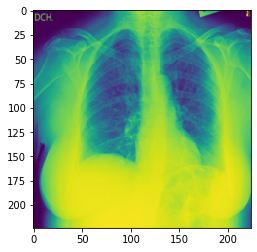

In [59]:
plt.imshow(image)

In [60]:
image

array([[[2.66666674e-01, 3.05175781e-08, 3.25490217e-01],
        [2.66666674e-01, 3.05175781e-08, 3.25490217e-01],
        [2.66666674e-01, 3.05175781e-08, 3.25490217e-01],
        ...,
        [4.82352928e-01, 2.90196098e-01, 2.90196095e-01],
        [3.05882347e-01, 6.66666832e-02, 3.41176493e-01],
        [2.70588233e-01, 1.56862907e-02, 3.37254923e-01]],

       [[2.66666674e-01, 3.05175781e-08, 3.25490217e-01],
        [2.66666674e-01, 3.05175781e-08, 3.25490217e-01],
        [2.66666674e-01, 3.05175781e-08, 3.25490217e-01],
        ...,
        [4.43137245e-01, 2.39215693e-01, 3.01960807e-01],
        [3.52941166e-01, 1.25490219e-01, 3.25490217e-01],
        [2.70588233e-01, 1.56862907e-02, 3.37254923e-01]],

       [[2.66666674e-01, 3.05175781e-08, 3.25490217e-01],
        [2.66666674e-01, 3.05175781e-08, 3.25490217e-01],
        [2.62745101e-01, 3.92156219e-03, 3.25490217e-01],
        ...,
        [4.90196065e-01, 2.94117670e-01, 2.90196095e-01],
        [3.13725493e-01, 7.45

In [50]:
image.shape

NameError: name 'image' is not defined

In [204]:
model=nn.Sequential(mod,densenet121_ft)

In [212]:
image = images[0]
img_tensor = preprocess(image)
img_variable = Variable(img_tensor.unsqueeze(0))
logit = densenet121_ft(img_variable)

h_x = F.softmax(logit, dim=1).data.squeeze()

In [103]:
h_x

tensor([0.0070, 0.0845, 0.9086])

In [56]:
predicted_labels=[]

In [62]:
labels[0].item()

2

In [225]:
!pip install opencv-python

     |████████████████████████████████| 49.5 MB 70.7 MB/s eta 0:00:01


In [241]:
import cv2
h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)
probs = probs.detach().numpy()
idx = idx.numpy()
predicted_labels.append(idx[0])
predicted =  class_names[idx[0]]
print("Target: " + str(labels[0].item()) + " | Predicted: " +  predicted) 
#features_blobs = mod(img_variable)
features_blobs = mod(img_variable)
features_blobs1 = features_blobs.cpu().detach().numpy()
CAMs = return_CAM(features_blobs, weight_softmax, [idx[0].item()])


Target: 2 | Predicted: covid


True

In [266]:
img = image
height, width,_ = img.shape
img = np.array(img, dtype = np.uint8 )
heatmap = cv2.applyColorMap(cv2.resize(CAMs[0],(width, height)), cv2.COLORMAP_JET)
result = heatmap * 0 + img * 0.5
cv2.imwrite("image_1.png", result)

True

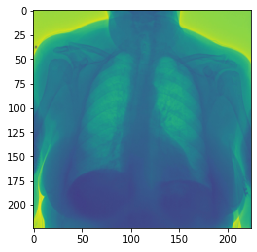

In [259]:
plt.imshow(img)

In [1]:
cv2.imshow('ImageWindow', img)

NameError: name 'cv2' is not defined

In [260]:
heatmap.shape

(224, 224, 3)

In [261]:
image.shape

(224, 224, 3)

In [265]:
img

array([[[0.59607844, 0.85098039, 0.2392157 ],
        [0.60392158, 0.84705883, 0.23529412],
        [0.61176471, 0.85098039, 0.22745099],
        ...,
        [0.49411763, 0.82745098, 0.30196081],
        [0.4862745 , 0.8235294 , 0.30588237],
        [0.46274509, 0.81960784, 0.31764708]],

       [[0.60784314, 0.85098039, 0.23137256],
        [0.62352942, 0.85098039, 0.21960785],
        [0.62745099, 0.85490195, 0.21568629],
        ...,
        [0.5137255 , 0.83137254, 0.29411767],
        [0.50588237, 0.82745098, 0.29803924],
        [0.47450979, 0.81568628, 0.31372551]],

       [[0.60784314, 0.85098039, 0.22745099],
        [0.62745099, 0.85098039, 0.21568629],
        [0.63137255, 0.85098039, 0.21176471],
        ...,
        [0.5137255 , 0.83137254, 0.29411767],
        [0.50588237, 0.82745098, 0.29803924],
        [0.47450979, 0.81960784, 0.31372551]],

       ...,

       [[0.64313727, 0.85882353, 0.20784315],
        [0.6627451 , 0.85882353, 0.2       ],
        [0.62745099, 0

In [222]:

size_upsample = (256, 256)
bz, nc, h, w = features_blobs1.shape
output_cam = []
for idx in [idx[0]]:
    print("idx: ", idx)
    beforeDot =  features_blobs1.reshape((nc, h*w))
    cam = np.matmul(weight_softmax.item(idx), beforeDot)
    cam = cam.reshape(h, w)
    cam = cam - np.min(cam)
    cam_img = cam / np.max(cam)
    cam_img = np.uint8(255 * cam_img)
    output_cam.append(cv2.resize(cam_img, size_upsample))

idx:  2


ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [197]:
beforeDot.shape

(1024, 49)

In [180]:
probs, idx = h_x.sort(0, True)

In [132]:
features_blobs.shape

torch.Size([1, 1024, 7, 7])

In [117]:
features_blobs.shape

torch.Size([1, 3])

In [111]:
features_blobs1.shape

(1, 1024, 7, 7)

In [115]:
beforeDot.shape

(1024, 49)

In [166]:
params[-1].shape

torch.Size([3])

In [171]:
weight_softmax = np.squeeze(params[-1].data.numpy())

In [221]:
weight_softmax

array([[-0.06294433,  0.03647196,  0.00844731, ..., -0.02526585,
         0.03291648, -0.05957047],
       [ 0.02986578,  0.0021279 , -0.02373566, ...,  0.05767398,
        -0.07131283, -0.01556929],
       [ 0.01818806, -0.00806212,  0.03409514, ...,  0.00145527,
         0.06395835,  0.07311922]], dtype=float32)

In [215]:
weight_softmax.item(idx[0])

-0.000989549676887691

In [193]:
idx

array([2, 1, 0])

In [154]:
weight_softmax[idx]

array([-0.00098955,  0.01506929, -0.02161741], dtype=float32)

In [99]:
np.matmul(weight[idx], beforeDot)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [96]:
for idx in [idx]:
    print(idx)

2


In [ ]:
activations = dict()
def forward_hook(module, input, output):
            activations['value'] = output
            return None
acts=densenet121_ft._modules['features'][9].register_forward_hook(forward_hook)
print(acts)

In [ ]:
images[4].shape

In [ ]:
labels[4]

In [ ]:
next_batch = iter(dl_train)

In [ ]:
images, labels = next(next_batch)

In [ ]:
image = images[4]
image = image.numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image = image * std + mean

In [ ]:
from torchvision.transforms import functional as tf
model = densenet121_ft.to(device)
model.eval()
img = tf.to_tensor(image)
inp_b = img.unsqueeze(dim=0)
inp_b = inp_b.to(device)

In [ ]:
inp_b.shape

In [ ]:
import random

import torch
from torch import nn
from torch.nn import functional as F
from torchvision.utils import save_image
from torchvision.models import densenet121


In [ ]:
class LayerActivations():
    features=[]
    def __init__(self,model):
        self.hooks = {}
        #model.layer4 is the last layer of our network before the Global Average Pooling layer(last convolutional layer).
        for name, module in model.named_modules():
            self.hooks[name] = module.register_forward_hook(self.hook_fn)
    def hook_fn(self,module,input,output):
        self.features.append(output)
    def remove(self):
        for hook in self.hooks:
            hook.remove()

In [ ]:
for name, module in model_ft.named_modules():
    print("name : ", name, "module : ", module)

In [ ]:
model_ft = densenet121_ft
#acts = LayerActivations(model_ft) 
acts = model_ft.features.denseblock4.denselayer16.conv2
out_features = acts
out_features = out_features.weight

In [ ]:
out_features.shape

In [ ]:
from scipy import ndimage, misc

In [ ]:
images, labels = next(iter(dl_train))

def show_images(images, labels, preds):
    plt.figure(figsize=(8, 4))
    for i, image in enumerate(images):
        plt.subplot(1, 6, i + 1, xticks=[], yticks=[])
        image = image.unsqueeze(0)
        logps = model_ft(image)
        ps = torch.exp(logps)
        pred = np.argmax(ps.cpu().detach())
        W = model_ft.features.denseblock4.denselayer16.conv2.weight
        w = W[pred,:]
        cam = np.dot(out_features.detach(),w.detach().cpu())
        #print("cam: ", cam)
        print(out_features.shape)
        print(w.shape)
        print("cam.shape: ", cam.shape)
        class_activation = ndimage.zoom(cam, zoom=(32,32), order=1)
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image, cmap = 'jet', alpha=1)
        plt.imshow(class_activation, cmap='jet',alpha=0.5)
        col = 'green'
        if preds[i] != labels[i]:
            col = 'red'        
        plt.xlabel(f'{class_names[int(labels[i].numpy())]}')
        plt.ylabel(f'{class_names[int(preds[i].numpy())]}', color=col)
    plt.tight_layout()
    plt.show()
outputs = model_ft(images)
_, preds = torch.max(outputs, 1)
show_images(images, labels, preds)